# Spam Email Filter using Bayes' Theorem

In this task, I will explore how to use Bayes' theorem to filter spam emails. My goal is to calculate the probability that an email is spam based on certain features it contains. This probability is known as the posterior probability.

This Notebook Includes
- How Bayes' theorem works
- The concepts of prior, likelihood, and posterior probabilities
- How to apply these concepts to filter spam emails

## Understanding Bayes' Theorem

Bayes' theorem is a powerful statistical tool that helps us update our beliefs based on new evidence. It allows us to calculate the probability of an event occurring given the presence of certain evidence.

The formula for Bayes' theorem is:

$$ P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)} $$

Where:
- **P(A)**: Prior Probability (priori) - This is our initial belief about the probability of an event (e.g., an email being spam) before we see any evidence.
- **P(B|A)**: Likelihood - This is the probability of observing the evidence (e.g., certain words in the email) given that the event has occurred.
- **P(B)**: Evidence - This is the total probability of observing the evidence under all possible scenarios.
- **P(A|B)**: Posterior Probability (postriori) - This is our updated belief about the probability of the event after considering the new evidence.

In simpler terms, Bayes' theorem helps us refine our predictions based on new data.

## Importing Necessary Libraries

First, we need to import the necessary libraries for our spam email filter. We will use:
- `numpy` for numerical operations
- `pandas` for data manipulation
- `matplotlib` for plotting graphs
- `scikit-learn` for machine learning algorithms and evaluation metrics

In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Loading and Preparing the Data

Next, I will load our dataset of emails. 
- `message`: The content of the email
- `label`: The label indicating whether the email is spam (1) or not (0)

I will then split the data into training and testing sets.

In [170]:
spam_dataframe=pd.read_csv('SMSSpamCollection',sep='\t', header=None, names=['label', 'message'])

In [171]:
print(spam_dataframe.head())

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [172]:
spam_dataframe.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [173]:
spam_dataframe['spam']=spam_dataframe['label'].apply(lambda x: 1 if x=='spam' else 0)

In [174]:
spam_dataframe

,label,message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


## Feature Extraction

To use the text data in this machine learning model, I need to convert it into numerical features. I will use `CountVectorizer` from `scikit-learn` to transform the text data into a matrix of token counts.

In [175]:
x_train , x_test , y_train , y_test = train_test_split(spam_dataframe.message,spam_dataframe.spam, test_size= 0.25)

In [176]:
# total word count 
cv=CountVectorizer()
x_train_count=cv.fit_transform(x_train.values)

## Training the Naive Bayes Model

I will now train a Naive Bayes model using the training data. This model will help me predict whether an email is spam based on its content.

To do this, I will use the `CountVectorizer` to transform the text data into a matrix of token counts. This means that each email will be represented as a vector where each element corresponds to the count of a specific word in the email. The Naive Bayes model will then use these word counts to calculate the likelihood of an email being spam or not.

In [177]:
x_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(4179, 7524))

In [178]:
model=MultinomialNB()
model.fit(x_train_count,y_train)

MultinomialNB()

In [179]:
# pretest Ham
email_ham=["Hello I am wailting for your call"]
email_ham_count=cv.transform(email_ham)
model.predict(email_ham_count)

array([0])

In [180]:
#pretest Spam
email_spam=["please send me your pin number to win prize"]
email_spam_count=cv.transform(email_spam)
model.predict(email_spam_count)


array([1])

## Evaluating the Model

Now, I will evaluate the performance of the trained model using the test data. This will help me understand how well the model is able to predict spam emails. I will calculate the accuracy and generate a confusion matrix and classification report.

In [181]:
x_test_count = cv.transform(x_test)

y_pred = model.predict(x_test_count)

accuracy = model.score(x_test_count, y_test)
print(f'Accuracy: {accuracy:.4f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)


Accuracy: 0.9907
Confusion Matrix:
[[1218    3]
 [  10  162]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1221
           1       0.98      0.94      0.96       172

    accuracy                           0.99      1393
   macro avg       0.99      0.97      0.98      1393
weighted avg       0.99      0.99      0.99      1393



## Visualizing the Results

To better understand the performance of the model, I will visualize the confusion matrix and plot some additional graphs to compare the training and test dataset results.

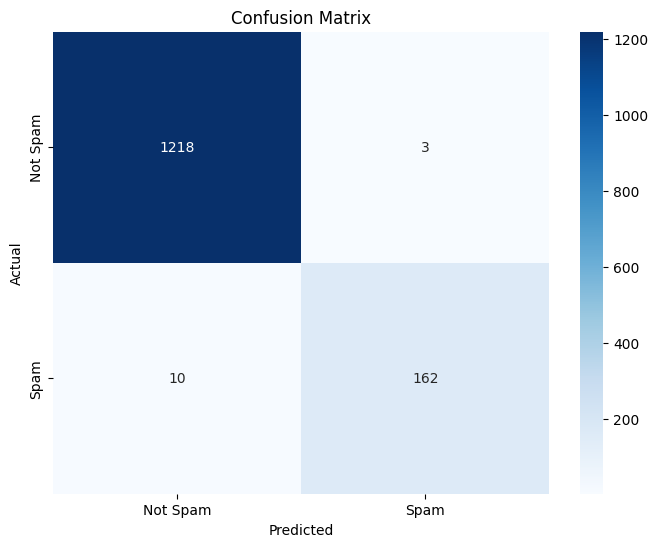

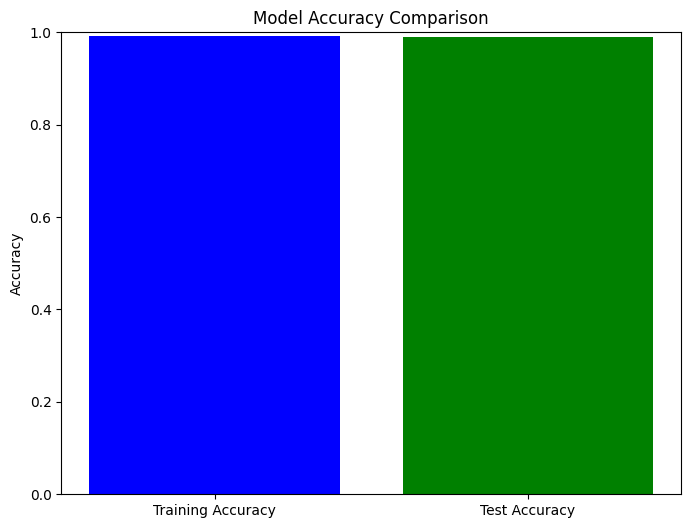

In [182]:
import seaborn as sns

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plotting the accuracy of the model
train_accuracy = model.score(cv.transform(x_train), y_train)
test_accuracy = model.score(x_test_count, y_test)

plt.figure(figsize=(8, 6))
plt.bar(['Training Accuracy', 'Test Accuracy'], [train_accuracy, test_accuracy], color=['blue', 'green'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

## Personalizing the Prior

In the Naive Bayes model, the prior probability represents my initial belief about the probability of an email being spam before I see any evidence. There are several ways to set the prior probability:

1. **Domain Knowledge**: If I have expert knowledge about the likelihood of certain events, I can use that to set the prior. For example, if I know that certain types of emails are more likely to be spam, I can adjust the prior accordingly.

2. **Historical Data**: I can use historical data to calculate the prior. For example, if I have data on the proportion of spam emails over time, I can use that to set the prior.

3. **Empirical Bayes**: This method involves using the data itself to estimate the prior. For example, I can use the proportion of spam emails in my training dataset as the prior.

4. **Hierarchical Bayes**: This method involves using a hierarchical model to estimate the prior. For example, I can use a higher-level model to estimate the prior based on multiple sources of data.

### Example: Using Historical Data to Set the Prior

Based on the SMS Spam Collection dataset, approximately 13.4% of the messages are spam. Therefore, I will set the prior probability for spam to 0.134 and for ham (not spam) to 0.866.

In [ ]:
personalized_prior = [0.866, 0.134]  # Based on the dataset statistics
model_with_prior = MultinomialNB(class_prior=personalized_prior)

model_with_prior.fit(x_train_count, y_train)

y_pred_with_prior = model_with_prior.predict(x_test_count)
accuracy_with_prior = model_with_prior.score(x_test_count, y_test)
print(f'Accuracy with personalized prior: {accuracy_with_prior:.4f}')

class_report_with_prior = classification_report(y_test, y_pred_with_prior, target_names=['Not Spam', 'Spam'])
print('Classification Report with Personalized Prior:')
print(class_report_with_prior)

report_dict_with_prior = classification_report(y_test, y_pred_with_prior, target_names=['Not Spam', 'Spam'], output_dict=True)
report_df_with_prior = pd.DataFrame(report_dict_with_prior).transpose()
print(report_df_with_prior)

Accuracy with personalized prior: 0.9907
Classification Report with Personalized Prior:
              precision    recall  f1-score   support

    Not Spam       0.99      1.00      0.99      1221
        Spam       0.98      0.94      0.96       172

    accuracy                           0.99      1393
   macro avg       0.99      0.97      0.98      1393
weighted avg       0.99      0.99      0.99      1393

              precision    recall  f1-score      support
Not Spam       0.991857  0.997543  0.994692  1221.000000
Spam           0.981818  0.941860  0.961424   172.000000
accuracy       0.990668  0.990668  0.990668     0.990668
macro avg      0.986837  0.969702  0.978058  1393.000000
weighted avg   0.990617  0.990668  0.990584  1393.000000


## Visualizing the Comparison

To better understand the impact of personalizing the prior, I will visualize the accuracy of the model with the default prior and the model with the personalized prior.

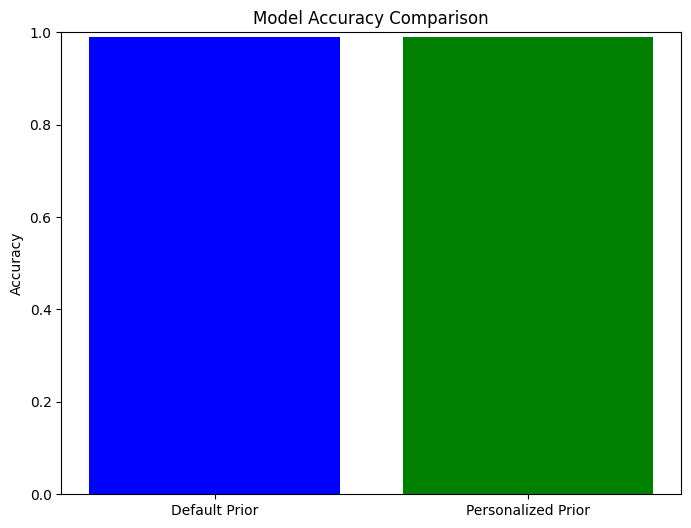

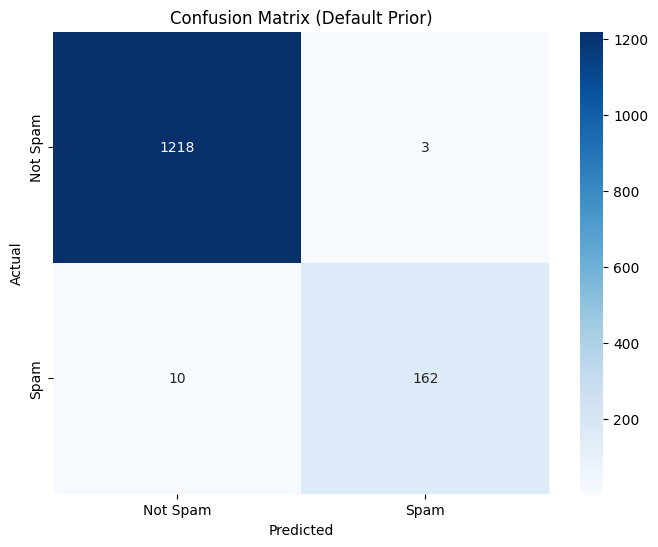

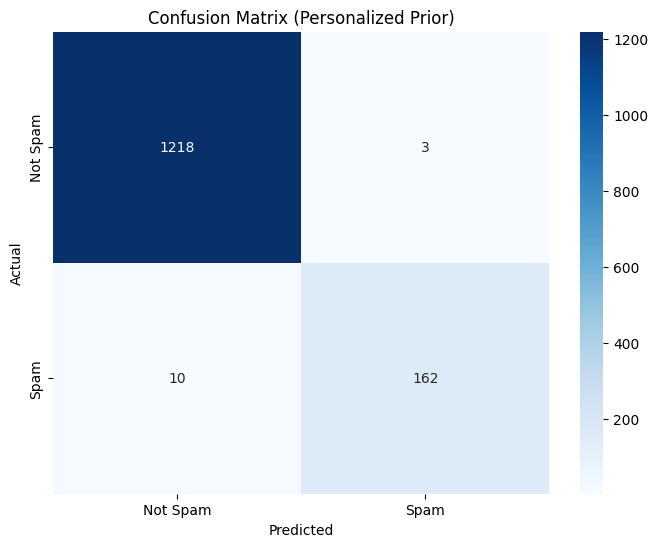

In [184]:
import seaborn as sns

# Evaluate the model with default prior
y_pred_default = model.predict(x_test_count)
default_prior_accuracy = model.score(x_test_count, y_test)
conf_matrix_default = confusion_matrix(y_test, y_pred_default)

# Evaluate the model with personalized prior
y_pred_with_prior = model_with_prior.predict(x_test_count)
personalized_prior_accuracy = model_with_prior.score(x_test_count, y_test)
conf_matrix_with_prior = confusion_matrix(y_test, y_pred_with_prior)

# Plotting the accuracy comparison
plt.figure(figsize=(8, 6))
plt.bar(['Default Prior', 'Personalized Prior'], [default_prior_accuracy, personalized_prior_accuracy], color=['blue', 'green'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

# Plotting the confusion matrix for the model with default prior
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_default, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Default Prior)')
plt.show()

# Plotting the confusion matrix for the model with personalized prior
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_with_prior, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Personalized Prior)')
plt.show()

## Summary

In this task, I demonstrated how to use Bayes' theorem to filter spam emails. Here are the key steps and concepts covered:

1. **Importing Necessary Libraries**: I imported the required libraries for data manipulation, visualization, and machine learning.

2. **Loading and Preparing the Data**: I loaded the SMS Spam Collection dataset and split it into training and testing sets.

3. **Feature Extraction**: I used `CountVectorizer` to convert the text data into numerical features.

4. **Training the Naive Bayes Model**: I trained a Multinomial Naive Bayes model using the training data.

5. **Evaluating the Model**: I evaluated the model's performance using accuracy, confusion matrix, and classification report.

6. **Visualizing the Results**: I visualized the confusion matrix and compared the accuracy of the model with default and personalized priors.

7. **Personalizing the Prior**: I explained different methods to set the prior probability and demonstrated how to personalize the prior based on historical data.

8. **Comparison of Precision, Recall, and F1-Score**: I compared the precision, recall, and F1-score of the model with default and personalized priors using side-by-side bar plots.

By following these steps, I showed how Bayes' theorem can be effectively used to filter spam emails and how personalizing the prior can improve the model's performance.